# Ejercicio 2: Transformación de variables

**1.** _Si $ y = \Phi(x) = exp(x) $, y $ p(x) = 1 $ para $ 0 \leq x \leq 1 $ (una distribución uniforme), ¿cuál es la distribución resultante para $ y $?_

La distribución resultante para $ y $ está dada por

$$
\begin{align*}
    p_y(y) &= p_x(\Phi^{-1}(y))\Big|\frac{d\Phi^{-1}(y)}{dy}\Big| & \\
           &= p_x(\ln y)\Big|\frac{1}{y}\Big| & \\
           &= \Big|\frac{1}{y}\Big| & 0 \leq \ln y \leq 1 \\
           &= \frac{1}{y} & 1 \leq y \leq e
\end{align*}
$$

**2.** _Si la variable $ flux $ sigue una distribución gaussiana, ¿cómo es la distribución de la variable $ mag = -2.5\log_{10}(flux) $? Usa un método de muestreo para reproducir las gráficas._

La distribución resultante para $ mag $ está dada por

$$
p_{mag}(mag) = p_{flux}(\Phi^{-1}(mag))\Big|\frac{d\Phi^{-1}(mag)}{dmag}\Big|
$$

Donde $ \Phi(flux) = -2.5\log_{10}(flux) \Rightarrow \Phi^{-1}(mag) = 10^{-0.4mag} $ y $ p_{flux}(flux) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(flux - \mu)^2/2\sigma^2} $. Por lo tanto:

$$
\begin{align*}
    p_{mag}(mag) &= p_{flux}(10^{-0.4mag})\Big|-0.4\ln(10)10^{-0.4mag}\Big| \\
           &= \frac{0.4\ln(10)}{\sqrt{2\pi}\sigma}10^{-0.4mag}\exp \{-(10^{-0.4mag} - \mu)^2/2\sigma^2\}
\end{align*}
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spe
import pylab
import math
import random

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)

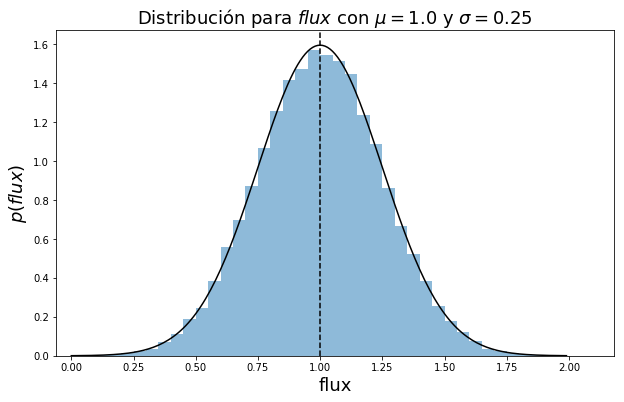

In [39]:
flux = [i for i in np.arange(0.0, 2.0, 0.01)]

def fx_gauss(x, sigma, mu):
    return (math.exp(-0.5 * ((x - mu) / sigma)**2) * 1.0 / (sigma * math.sqrt(2.0 * math.pi)))

vecfun = np.vectorize(fx_gauss)

sigma = 0.25
mu = 1.0

plt.plot(flux, vecfun(flux, sigma, mu), 'k')
    
plt.xlabel('flux', fontsize = 18)
plt.ylabel('$p(flux)$', fontsize = 18)
plt.title(r'Distribución para $flux$ con $\mu = 1.0$ y $\sigma = 0.25$', fontsize = 18)

# Muestreo
def inverse_cmd_gauss(x, sigma, mu):
    return spe.erfinv(2.0 * x - 1.0) * math.sqrt(2.0) * sigma + mu

vecinv = np.vectorize(inverse_cmd_gauss)

flux_values = []

for i in range(50000):
    rand_num = random.random()
    flux_values.append(vecinv(rand_num, sigma, mu))

bins = np.arange(0.0, 2.0, 0.05) # Fijo el tamaño del bin

plt.xlim([min(flux_values), max(flux_values)])

plt.hist(flux_values, bins=bins, density = True, alpha=0.5)
plt.axvline(1.0, color = 'k', linestyle = '--')

flux_values = []

Para hacer el muestreo de $ mag $, hay que considerar que su función de distribución acumulada es

$$
P_{mag}(a) = \frac{0.4\ln(10)}{\sqrt{2\pi}\sigma} \int_{-\infty}^{a} 10^{-0.4y}\exp \{-(10^{-0.4y} - \mu)^2/2\sigma^2\} dy
$$

Haciendo el cambio de variable $ u = \frac{10^{-0.4y} - \mu}{\sqrt{2}\sigma} $, tenemos que

$$
\begin{align*}
    P_{mag}(a) &= \frac{-1}{\sqrt{\pi}} \int_{\infty}^{\frac{10^{-0.4a} - \mu}{\sqrt{2}\sigma}} e^{-u^2} du \\
               &= \frac{1}{\sqrt{\pi}} \int_{\frac{10^{-0.4a} - \mu}{\sqrt{2}\sigma}}^{\infty} e^{-u^2} du \\
               &= \frac{1}{\sqrt{\pi}} \Bigg[\frac{\sqrt{\pi}}{2} - \int_{0}^{\frac{10^{-0.4a} - \mu}{\sqrt{2}\sigma}} e^{-u^2} du \Bigg] \\
               &= \frac{1}{2} \Big[1 - erf\Big(\frac{10^{-0.4a} - \mu}{\sqrt{2}\sigma}\Big)\Big]
\end{align*}
$$

cuya función inversa es

$$
P_{mag}^{-1}(x) = -2.5\log_{10}[erf^{-1}(1 - 2x)\sqrt{2}\sigma + \mu]
$$

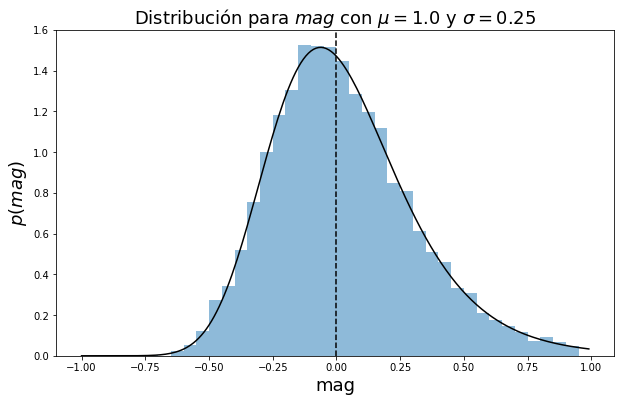

In [66]:
mag = [i for i in np.arange(-1.0, 1.0, 0.01)]

def p_mag(x, sigma, mu):
    return (math.exp(-0.5 * ((math.pow(10.0, -0.4 * x) - mu) / sigma)**2) * \
           (0.4 * math.log(10.0) * math.pow(10.0, -0.4 * x)) / (sigma * math.sqrt(2.0 * math.pi)))

vecfun = np.vectorize(p_mag)

sigma = 0.25
mu = 1.0

plt.plot(mag, vecfun(mag, sigma, mu), 'k')
    
plt.xlabel('mag', fontsize = 18)
plt.ylabel('$p(mag)$', fontsize = 18)
plt.title(r'Distribución para $mag$ con $\mu = 1.0$ y $\sigma = 0.25$', fontsize = 18)

# Muestreo
def inverse_p_mag(x, sigma, mu):
    return -2.5 * math.log(math.sqrt(2.0) * sigma * spe.erfinv(1.0 - 2.0 * x) + mu, 10.0)

vecinv = np.vectorize(inverse_p_mag)

mag_values = []

for i in range(10000):
    rand_num = random.random()
    x_value = 0.5 * (1.0 - spe.erf(-mu/(math.sqrt(2.0) * sigma))) # Valor prohibido para P_mag^-1
    if rand_num < x_value:
        mag_values.append(vecinv(rand_num, sigma, mu))

bins = np.arange(-1.0, 1.0, 0.05) # Fijo el tamaño del bin

plt.hist(mag_values, bins=bins, density = True, alpha=0.5)
plt.axvline(color = 'k', linestyle = '--')

mag_values = []